In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd

In [ ]:
activity = pd.read_csv('/content/drive/MyDrive/Venturas_Ltd/activity.csv')

In [ ]:
target = pd.read_csv('/content/drive/MyDrive/Venturas_Ltd/target.csv')

In [ ]:
activity.head()

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


In [ ]:
activity.size

3619088

In [ ]:
target.head()

,customer,date
0,0032j000001UaIdAAK,2020-11-06
1,0032j000002hwpFAAQ,2021-05-20
2,0032j0000077nwFAAQ,2020-12-18
3,0032j000001UU6aAAG,2020-11-20
4,0032j000001UFAIAA4,2021-02-18


In [ ]:
target.size

8712

In [ ]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904772 entries, 0 to 904771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            904772 non-null  object
 1   customer        904772 non-null  object
 2   activity_type   904772 non-null  object
 3   activity_count  904772 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.6+ MB


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   customer  4356 non-null   object
 1   date      4356 non-null   object
dtypes: object(2)
memory usage: 68.2+ KB


In [ ]:
target.corrwith(activity, axis = 0)

activity_count   NaN
dtype: float64

In [ ]:
target['label'] = 1

In [ ]:
target

,customer,date,label
0,0032j000001UaIdAAK,2020-11-06,1
1,0032j000002hwpFAAQ,2021-05-20,1
2,0032j0000077nwFAAQ,2020-12-18,1
3,0032j000001UU6aAAG,2020-11-20,1
4,0032j000001UFAIAA4,2021-02-18,1
...,...,...,...
4351,0032j00000BHLtnAAH,2021-05-07,1
4352,0032j00000FafiJAAR,2021-04-20,1
4353,0032j000004dfk5AAA,2021-05-20,1
4354,0032j000002j97vAAA,2021-03-12,1


In [ ]:
activity['activity_count'].value_counts()

1    904772
Name: activity_count, dtype: int64

In [ ]:
activity['customer'].value_counts()

0032j000002j4GWAAY    2679
0032j000007nSMwAAM    2096
0032j000002j4GJAAY    1875
0032j000007nSNAAA2    1663
0032j000001Ug00AAC    1632
                      ... 
0032j000008lkdVAAQ       1
0032j000007oA8mAAE       1
0032j000004e8msAAA       1
0032j000001UWDEAA4       1
0032j00000BHDuCAAX       1
Name: customer, Length: 139556, dtype: int64

In [ ]:
activity['activity_type'].value_counts()

m    141826
l    105307
x     87210
u     72070
j     67173
n     66369
a     54025
h     51355
i     38058
p     32318
b     30453
f     28804
y     26521
t     22475
v     20111
o     19318
w     18691
s     10313
c      6115
d      2728
k      1891
r      1032
q       490
e        71
g        48
Name: activity_type, dtype: int64

In [ ]:
activity_new = pd.merge(activity, target, on=['customer', 'date'], how='left')

In [ ]:
activity_new = activity_new.fillna(0)

In [ ]:
activity_new

,date,customer,activity_type,activity_count,label
0,2021-01-20,0032j000002jRYxAAM,a,1,0.0
1,2021-05-11,0032j00000FZcIvAAL,a,1,0.0
2,2020-12-09,0032j000002gKM8AAM,a,1,0.0
3,2021-03-30,0032j000001UX7cAAG,a,1,0.0
4,2020-10-19,0032j000004etUWAAY,a,1,0.0
...,...,...,...,...,...
904767,2020-10-16,0032j00000BHEpXAAX,f,1,0.0
904768,2020-10-16,0032j00000BHEqDAAX,f,1,0.0
904769,2020-10-16,0032j00000BHEo8AAH,f,1,0.0
904770,2020-10-16,0032j00000BHDuCAAX,f,1,0.0


In [ ]:
activity_new['label'].value_counts()

0.0    891078
1.0     13694
Name: label, dtype: int64

In [ ]:
from sklearn.utils import resample

activity_new_majority = activity_new[activity_new.label==0]
activity_new_minority = activity_new[activity_new.label==1]

activity_new_majority_downsampled = resample(activity_new_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
activity_new_downsampled = pd.concat([activity_new_majority_downsampled, activity_new_minority])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

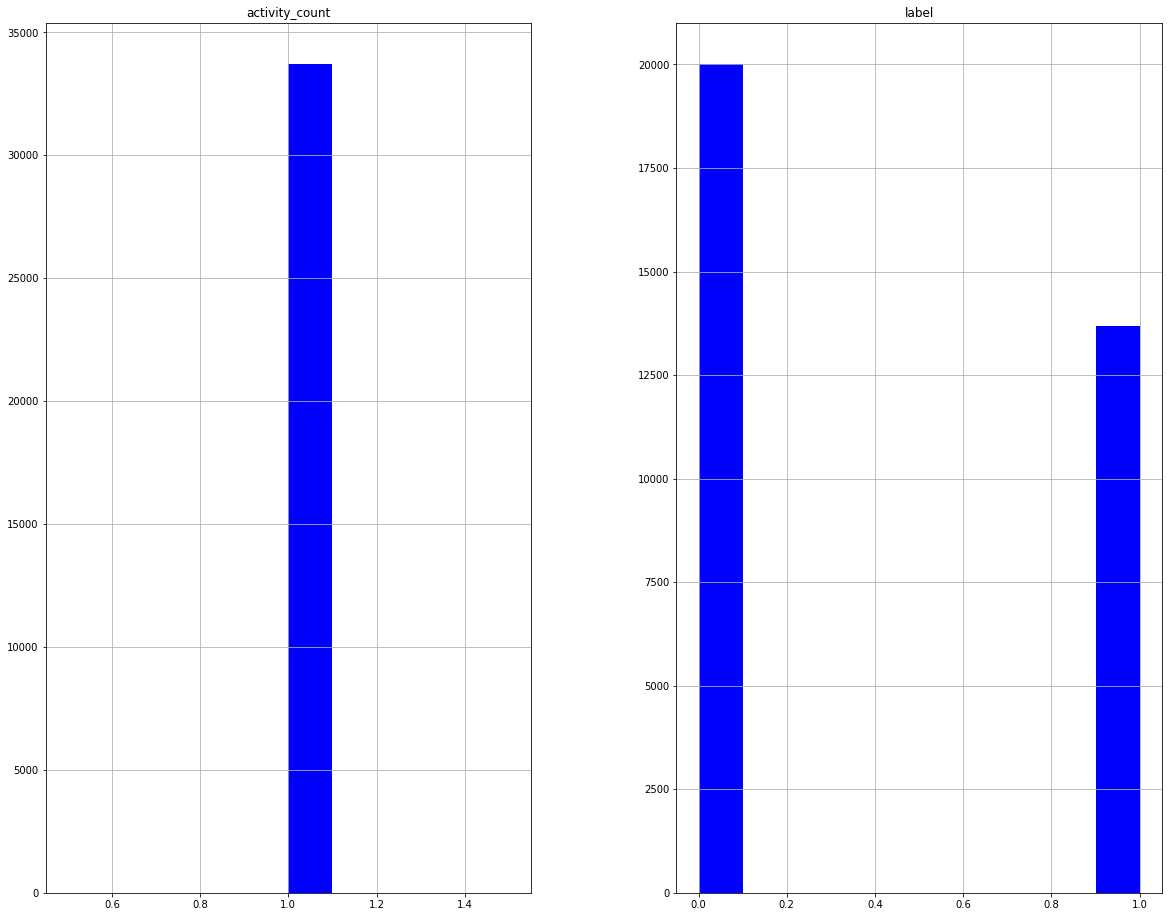

In [ ]:
activity_new_downsampled.hist(figsize=(20,16), color = 'blue');

In [ ]:
activity_new_downsampled = activity_new_downsampled.drop(['date', 'customer', 'activity_count'], axis=1)

In [ ]:
activity_new_downsampled

,activity_type,label
270313,w,0.0
51266,s,0.0
559913,b,0.0
48303,o,0.0
713700,m,0.0
...,...,...
896323,i,1.0
896326,i,1.0
896361,i,1.0
896378,i,1.0


In [ ]:
#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder

# categorical to numeric
def obj_to_num(df):
    for c in df.columns:
        if df[c].dtype=='object':    #Since we are encoding object datatype to integer/float
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    return df

In [ ]:
activity_new_downsampled = obj_to_num(activity_new_downsampled)

In [ ]:
activity_new_downsampled

,activity_type,label
270313,21,0.0
51266,17,0.0
559913,1,0.0
48303,13,0.0
713700,11,0.0
...,...,...
896323,7,1.0
896326,7,1.0
896361,7,1.0
896378,7,1.0


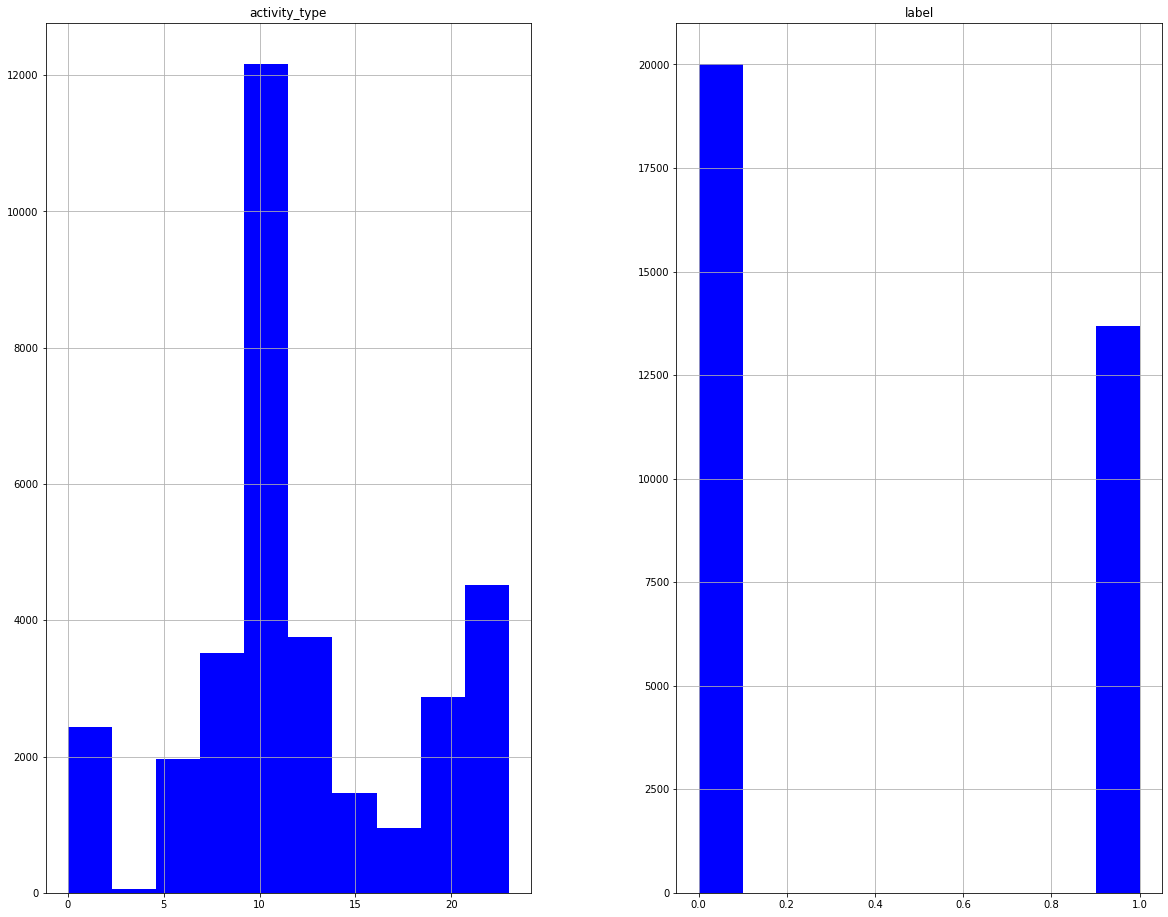

In [ ]:
activity_new_downsampled.hist(figsize=(20,16), color = 'blue');

In [ ]:
activity_new_downsampled['activity_type'].value_counts()

10    6349
11    5807
12    3229
22    2396
19    1929
8     1809
7     1681
0     1577
14    1413
23    1334
6     1331
20     940
21     794
1      695
18     654
5      630
13     524
17     293
2      157
3       61
16      43
9       36
15      10
4        2
Name: activity_type, dtype: int64

In [ ]:
# Separating the dataset as response variable and feature variables

X = activity_new_downsampled.drop('label', axis = 1)
y = activity_new_downsampled['label']

In [ ]:
#Train and Test splitting of data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
print("1111111111111",X_train)
print("2222222222222",X_test)
print("3333333333333",y_train)
print("444444444444",y_test)

1111111111111         activity_type
116664             10
154016              6
878517              7
303747             11
851614             10
...               ...
313268             11
720791             11
124611             18
572384              8
153041              6

[23585 rows x 1 columns]
2222222222222         activity_type
235380             19
851486             10
200858             19
56011              18
20337               5
...               ...
53949              16
170212              6
139120              6
566401              8
656220              0

[10109 rows x 1 columns]
3333333333333 116664    0.0
154016    0.0
878517    1.0
303747    1.0
851614    1.0
         ... 
313268    1.0
720791    0.0
124611    0.0
572384    0.0
153041    0.0
Name: label, Length: 23585, dtype: float64
444444444444 235380    0.0
851486    1.0
200858    0.0
56011     0.0
20337     0.0
         ... 
53949     1.0
170212    0.0
139120    0.0
566401    0.0
656220    0.0
Name: label, L

In [ ]:
from sklearn.preprocessing import StandardScaler

# Applying Standard scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[-0.33838036]
 [-1.01660769]
 [-0.84705086]
 ...
 [ 1.01807428]
 [-0.67749403]
 [-1.01660769]]
[[ 1.18763111]
 [-0.33838036]
 [ 1.18763111]
 ...
 [-1.01660769]
 [-0.67749403]
 [-2.03394867]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc

### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
# Checking Model Performance
print("Classification Matrix:")
print(classification_report(y_test, pred_rfc))
print("Cofusion Matrix:")
cm = confusion_matrix(y_test, pred_rfc)
print(cm)
print("accuracy 0 and 1",cm.diagonal()/cm.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      6000
         1.0       0.58      0.64      0.60      4109

    accuracy                           0.66     10109
   macro avg       0.65      0.66      0.65     10109
weighted avg       0.67      0.66      0.66     10109

Cofusion Matrix:
[[4073 1927]
 [1492 2617]]
accuracy 0 and 1 [0.67883333 0.63689462]


### Logistic Regression

In [ ]:
lReg = LogisticRegression(penalty='l2',tol=0.001,random_state=0)
lReg.fit(X_train, y_train)
pred_lReg = lReg.predict(X_test)

In [ ]:
import numpy as np

print("Classification Matrix:")
print(classification_report(y_test, pred_lReg))
print("Cofusion Matrix:")
y_test = np.array(y_test)
cm_lReg = confusion_matrix(y_test.astype(int), pred_lReg.astype(int))
print(cm_lReg)
print("111111",type(y_test),"22222222222", type(pred_lReg))
print("accuracy 0 and 1",cm_lReg.diagonal()/cm_lReg.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74      6000
         1.0       0.00      0.00      0.00      4109

    accuracy                           0.59     10109
   macro avg       0.30      0.50      0.37     10109
weighted avg       0.35      0.59      0.44     10109

Cofusion Matrix:
[[6000    0]
 [4109    0]]
111111 <class 'numpy.ndarray'> 22222222222 <class 'numpy.ndarray'>
accuracy 0 and 1 [1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from collections import Counter

In [ ]:
Counter(pred_lReg)

Counter({0.0: 10109})

In [ ]:
Counter(y_train)

Counter({0.0: 14000, 1.0: 9585})

### SVM classifier

In [68]:
sv = SVC(tol = 0.001)
sv.fit(X_train, y_train)
pred_sv = sv.predict(X_test)

In [69]:
print("Classification Matrix:")
print(classification_report(y_test, pred_sv))
print("Cofusion Matrix:")
cm = confusion_matrix(y_test, pred_sv)
print(cm)
print("accuracy 0,1",cm.diagonal()/cm.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.72      0.65      0.68      6000
         1.0       0.55      0.63      0.59      4109

    accuracy                           0.64     10109
   macro avg       0.64      0.64      0.64     10109
weighted avg       0.65      0.64      0.65     10109

Cofusion Matrix:
[[3908 2092]
 [1523 2586]]
accuracy 0,1 [0.65133333 0.62935021]


### Gradient Boost

In [ ]:
gboost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=9, random_state=0)
gboost.fit(X_train, y_train)
pred_gboost = gboost.predict(X_test)

In [ ]:
print("Classification Matrix:")
print(classification_report(y_test, pred_gboost))
print("Cofusion Matrix:")
cm = confusion_matrix(y_test, pred_gboost)
print(cm)
print("accuracy 0,1",cm.diagonal()/cm.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      6000
         1.0       0.58      0.64      0.60      4109

    accuracy                           0.66     10109
   macro avg       0.65      0.66      0.65     10109
weighted avg       0.67      0.66      0.66     10109

Cofusion Matrix:
[[4073 1927]
 [1492 2617]]
accuracy 0,1 [0.67883333 0.63689462]


### Neural Network

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(25,25,25), max_iter=200)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [ ]:
print("Classification Matrix:")
print(classification_report(y_test, pred_mlpc))
print("Cofusion Matrix:")
cm = confusion_matrix(y_test, pred_mlpc)
print(cm)
print("accuracy 0,1",cm.diagonal()/cm.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      6000
         1.0       0.58      0.58      0.58      4109

    accuracy                           0.66     10109
   macro avg       0.65      0.65      0.65     10109
weighted avg       0.66      0.66      0.66     10109

Cofusion Matrix:
[[4278 1722]
 [1717 2392]]
accuracy 0,1 [0.713      0.58213677]


### XG Boost

In [71]:
from xgboost import XGBClassifier

In [76]:
xgb_classifier = XGBClassifier(base_score=0.5,eval_metric='mlogloss',learning_rate=0.003,max_depth=6)
xgb_classifier.fit(X_train, y_train)
pred_xgb = xgb_classifier.predict(X_test)

In [77]:
print("Classification Matrix:")
print(classification_report(y_test, pred_xgb))
print("Cofusion Matrix:")
cm = confusion_matrix(y_test, pred_xgb)
print(cm)
print("accuracy 0,1",cm.diagonal()/cm.sum(axis=1))

Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      6000
         1.0       0.58      0.64      0.60      4109

    accuracy                           0.66     10109
   macro avg       0.65      0.66      0.65     10109
weighted avg       0.67      0.66      0.66     10109

Cofusion Matrix:
[[4073 1927]
 [1492 2617]]
accuracy 0,1 [0.67883333 0.63689462]
